In [1]:
%load_ext autoreload
%autoreload 2

## Physics Informed Neural Networks to Approximate Solution of PDEs

In [2]:
from pinn import NNAnsatz, PINNTrainer
import matplotlib.pyplot as plt
import numpy as np

# Your task: Solve the system of equations using PINNs

System of two linear reaction-convection-diffusion equations

You will have to implement the following
1. initialize the approximate neural network solution
2. implement the functions add interior points, add temporal boundary points,
   and add spatial boundary points; 
3. implement the function apply initial condition;
4. implement the function apply boundary conditions;
5. implement the function compute pde residuals;
6. train the model.









# Setting up the training data

Just familiarize yourself with how we generate collocation points for the different types of residuals.

In [3]:
kwargs = {
    "alpha_f" :0.05 ,
    "h_f" : 5,
    "T_hot" : 4,
    "u_f" : 1,
    "alpha_s" : 0.08,
    "h_s" : 6,
    "T0" : 1,
}

In [4]:
# Solve the heat equation:
# u_t = u_xx, (t,x) in [0, 0.1]x[-1,1]
# with zero dirichlet BC and
# u(x,0)= -sin(pi * x).

n_int = 256
n_sb = 64
n_tb = 64

pinn = PINNTrainer(n_int, n_sb, n_tb, **kwargs)

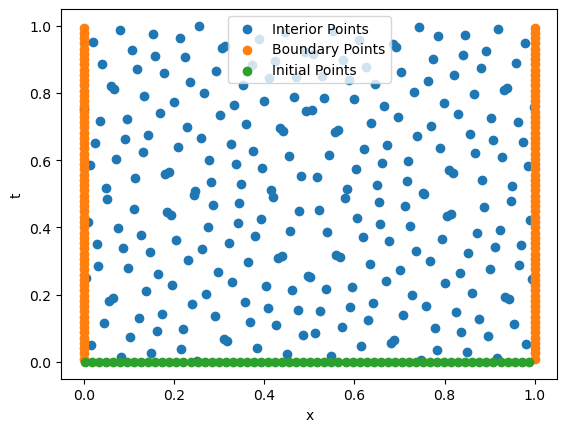

In [5]:
# Plot the input training points.
input_sb_, output_sb_ = pinn.add_spatial_boundary_points()
input_tb_, output_tb_ = pinn.add_temporal_boundary_points()
input_int_, output_int_ = pinn.add_interior_points()

plt.scatter(
    input_int_[:, 1].detach().numpy(),
    input_int_[:, 0].detach().numpy(),
    label="Interior Points")
plt.scatter(
    input_sb_[:, 1].detach().numpy(),
    input_sb_[:, 0].detach().numpy(),
    label="Boundary Points")
plt.scatter(
    input_tb_[:, 1].detach().numpy(),
    input_tb_[:, 0].detach().numpy(),
    label="Initial Points")

plt.xlabel("x")
plt.ylabel("t")
plt.legend()

plt.show()

In [6]:
output_sb_

tensor([[4.0797e-21, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.4007e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [2.9376e-10, 0.0000e+00],
        [7.8822e-05, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.0947e-15, 0.0000e+00],
        [5.6709e-13, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [3.9751e-02, 0.0000e+00],
        [1.5217e-07, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.5000e+00, 0.0000e+00],
        [1.4998e+00, 0.0000e+00],
        [1.500

# Training

Train your network and ensure your loss is low, and that your predictions are qualitatively similar to the true solution (plots should look similar).

In [7]:
hist = pinn.fit(num_epochs=25, verbose=True)

################################  0  ################################
Total loss:  1.2254 | PDE Loss:  0.2248 | Function Loss:  -1.6152
Total loss:  1.1911 | PDE Loss:  0.1909 | Function Loss:  -2.161
Total loss:  1.4333 | PDE Loss:  0.0206 | Function Loss:  1.2211
Total loss:  0.8294 | PDE Loss:  -0.2377 | Function Loss:  -0.015
Total loss:  2.1507 | PDE Loss:  0.5476 | Function Loss:  2.0261
Total loss:  1.7066 | PDE Loss:  0.2173 | Function Loss:  1.5364
Total loss:  0.829 | PDE Loss:  -0.234 | Function Loss:  -0.0409
Total loss:  1.1483 | PDE Loss:  -0.078 | Function Loss:  0.7569
Total loss:  0.7986 | PDE Loss:  -0.21 | Function Loss:  -0.9117
Total loss:  0.8838 | PDE Loss:  -0.2299 | Function Loss:  0.2463
Total loss:  0.7752 | PDE Loss:  -0.229 | Function Loss:  -1.2392
Total loss:  0.7747 | PDE Loss:  -0.2267 | Function Loss:  -1.6959
Total loss:  0.7747 | PDE Loss:  -0.2273 | Function Loss:  -1.5649
Total loss:  0.7747 | PDE Loss:  -0.2273 | Function Loss:  -1.5589
Total loss

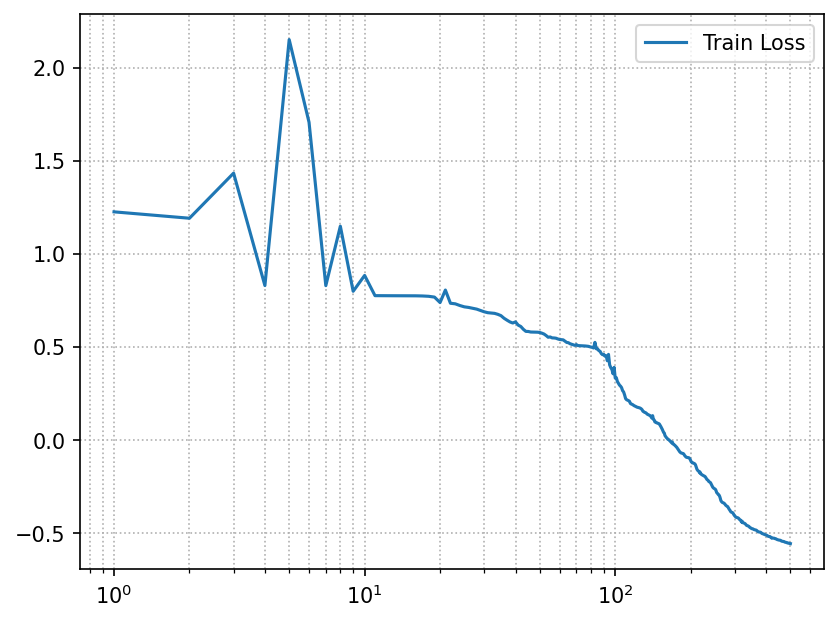

In [8]:
plt.figure(dpi=150, figsize=(6, 4))
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1, len(hist) + 1), hist, label="Train Loss")
plt.xscale("log")
plt.legend()

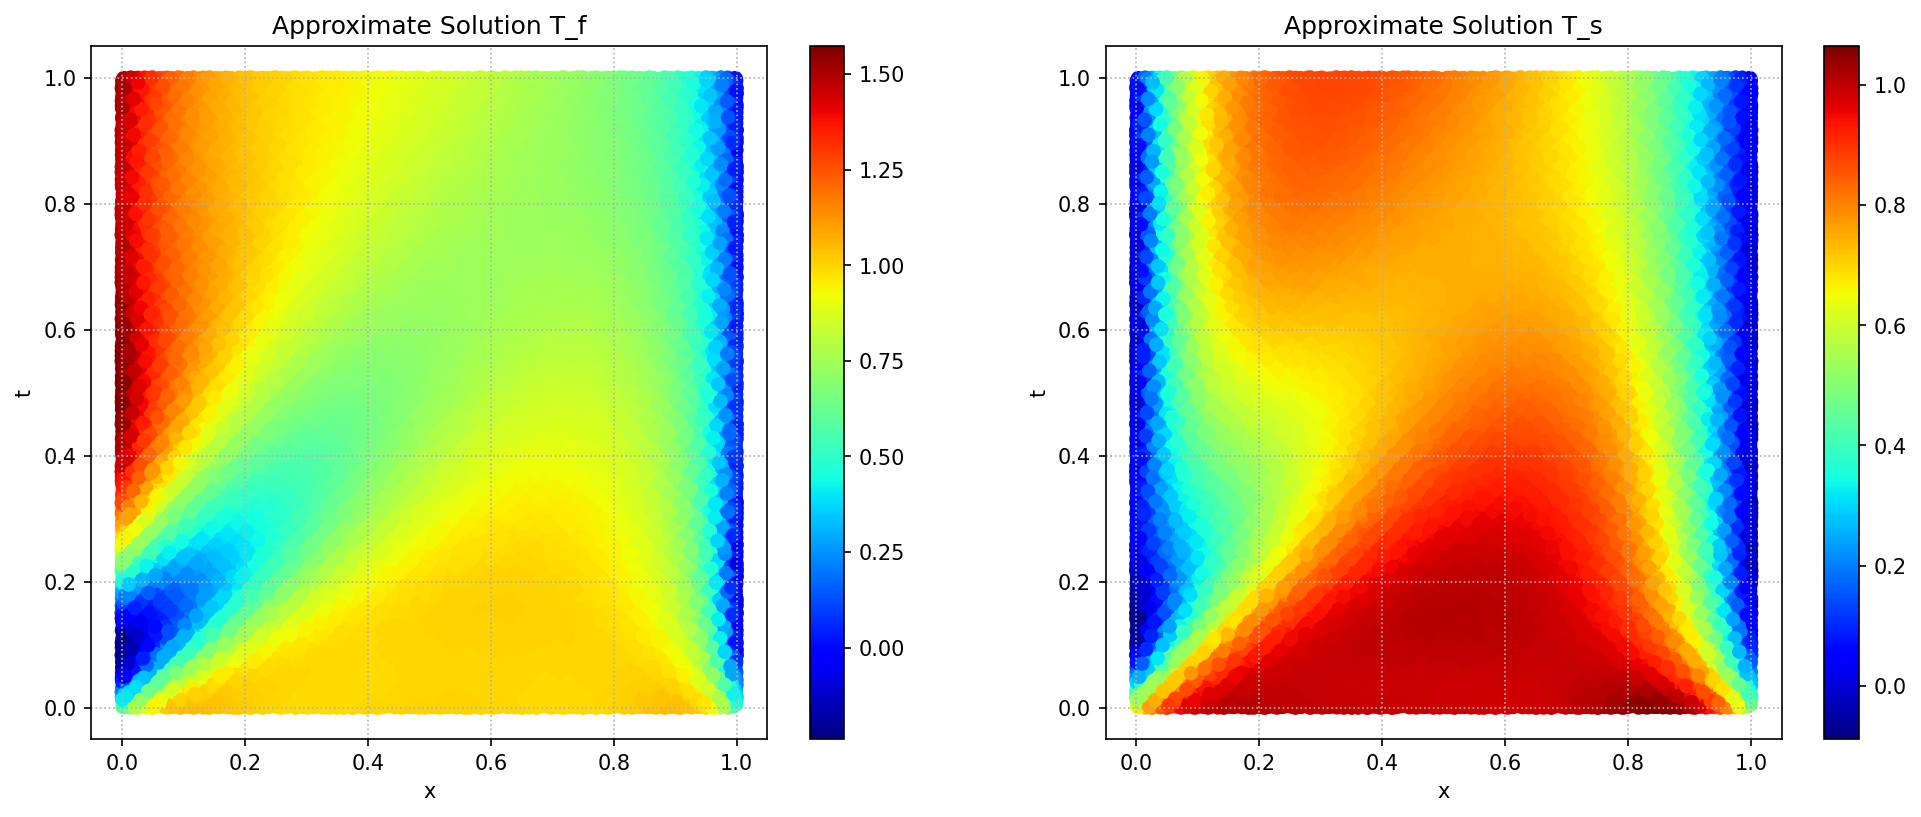

In [11]:
pinn.plot()